Practicing machine learning to gain proficiency

Importing Neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
beer_df = pd.read_csv("./../Assignment4/Consumo_cerveja_ass4.csv")
beer_df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [3]:
beer_df.shape

(941, 7)

In [4]:
beer_df.dtypes

Data                            object
Temperatura Media (C)           object
Temperatura Minima (C)          object
Temperatura Maxima (C)          object
Precipitacao (mm)               object
Final de Semana                float64
Consumo de cerveja (litros)    float64
dtype: object

Turning the temperature and the precipitacao(mm) columns to type float; Changing comma to decimal point

In [5]:
edit_column = beer_df.iloc[:, 1:5].columns
edit_column
for column in edit_column:
    beer_df[column] = beer_df[column].str.replace(",", ".").astype("float")

In [6]:
per_duplicated = beer_df.duplicated().sum()/len(beer_df.duplicated())
per_duplicated = round(per_duplicated * 100, 2)
print(f"{per_duplicated}% of the data is duplicated")

# run this cell again after dropping the duplicates if you wish, 
# you don't have because it would be 0.0% when you come back

61.11% of the data is duplicated


dropping duplicated data

In [7]:
beer_df.drop_duplicates(inplace=True)
beer_df.shape

(366, 7)

In [8]:
beer_df.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


In [9]:
#Creating new features from the date column (actually called Data) 
beer_df["Data"] = pd.to_datetime(beer_df["Data"])
print(beer_df.dtypes)

#Creating new features from the date column
beer_df["Month"] = beer_df["Data"].dt.month #Month represent Jan to Dec mapped to 1 - 12
beer_df["Day"] = beer_df["Data"].dt.day_of_week #Day of week Mon - Sun mapped 0 - 6

#Setting the date column (Data) as the index column
beer_df.set_index("Data", inplace=True)

#checking for null values
beer_df.isna().sum()

Data                           datetime64[ns]
Temperatura Media (C)                 float64
Temperatura Minima (C)                float64
Temperatura Maxima (C)                float64
Precipitacao (mm)                     float64
Final de Semana                       float64
Consumo de cerveja (litros)           float64
dtype: object


Temperatura Media (C)          1
Temperatura Minima (C)         1
Temperatura Maxima (C)         1
Precipitacao (mm)              1
Final de Semana                1
Consumo de cerveja (litros)    1
Month                          1
Day                            1
dtype: int64

In [10]:
beer_df.dropna(inplace=True)

In [11]:
beer_df.isna().sum()

Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
Month                          0
Day                            0
dtype: int64

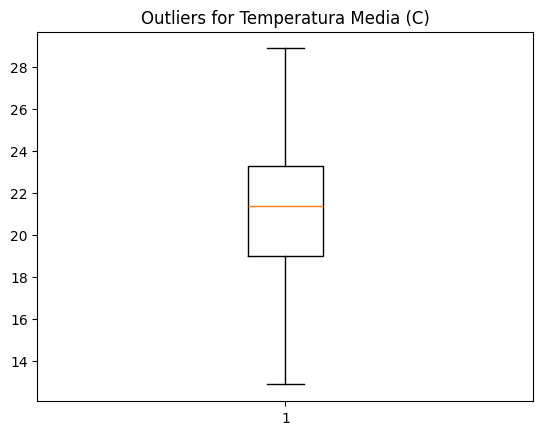

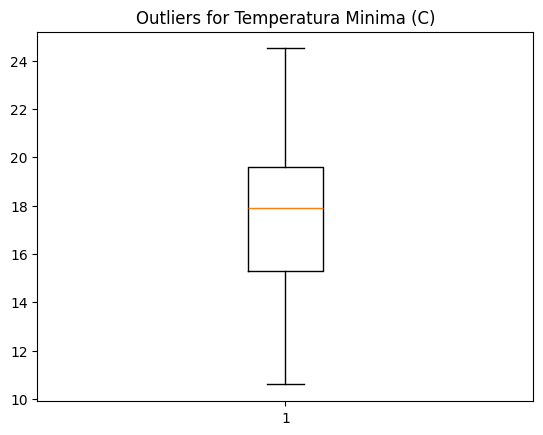

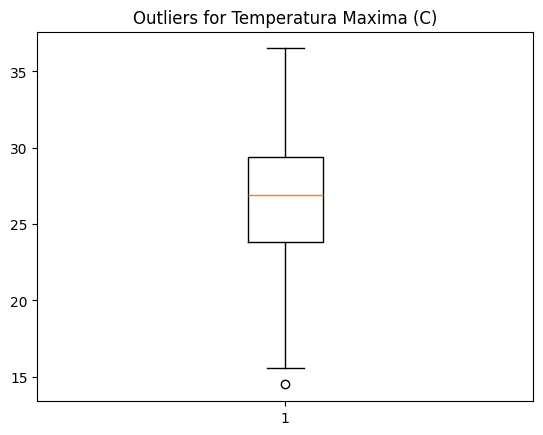

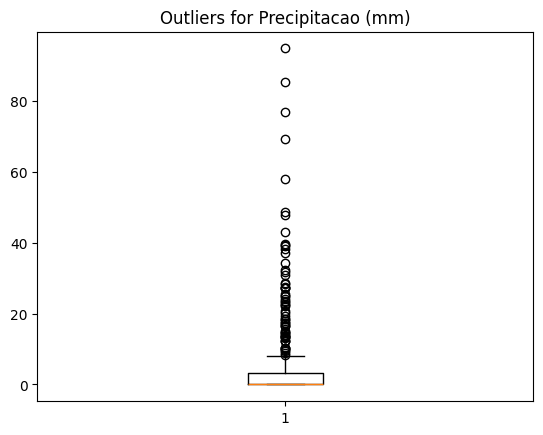

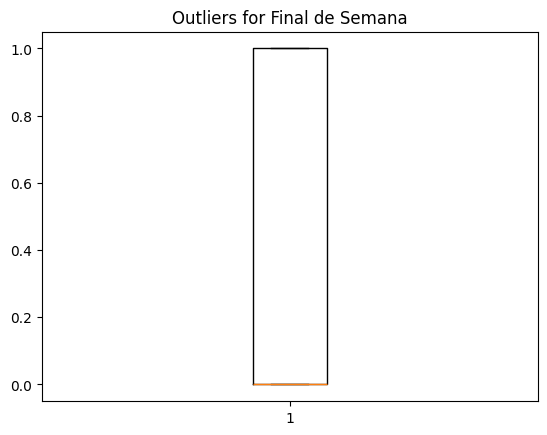

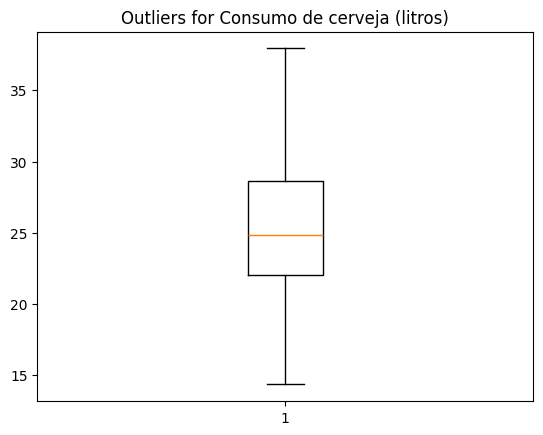

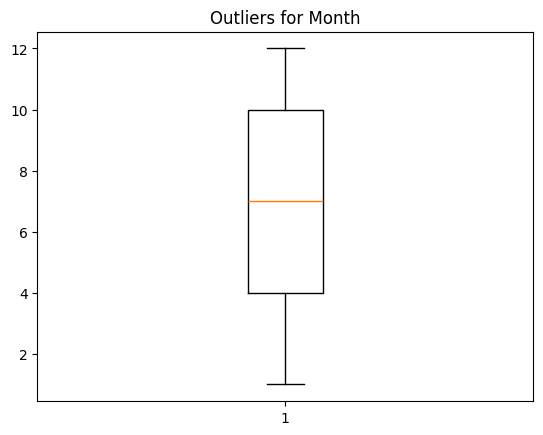

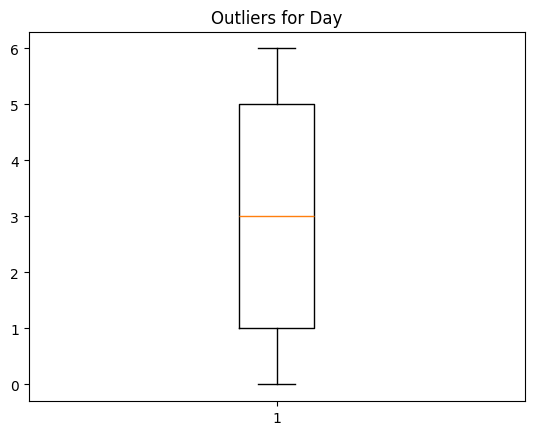

In [12]:
for column in beer_df.columns:
    fig, ax = plt.subplots()
    ax.boxplot(beer_df[column])
    ax.set_title(f"Outliers for {column}")

Only the precipitation column have outliers that is logical because not every day is not going to be rainy but I guess there should be seasons. I guess a timeline plot would help me figure that out

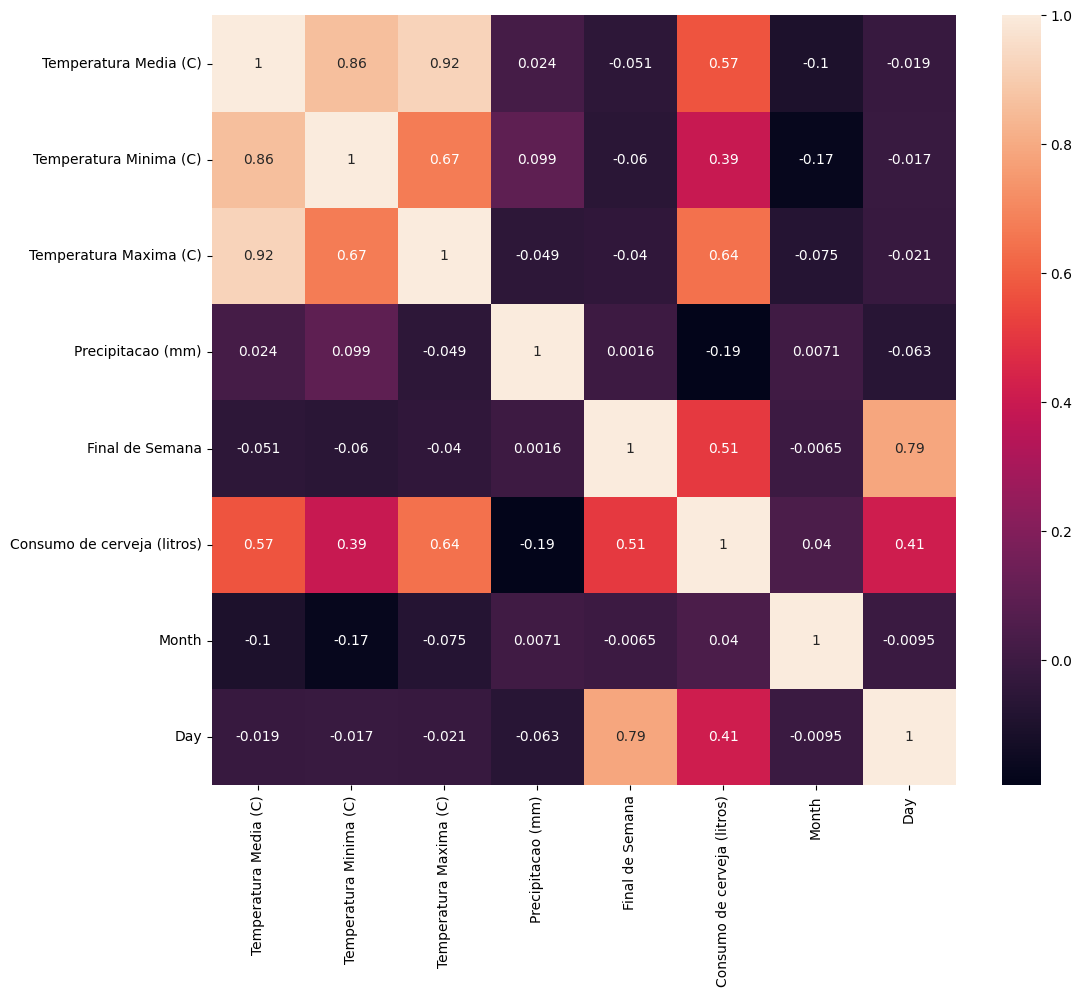

In [13]:
data = beer_df.corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(data=data, annot=True,ax=ax);

Corelation between Temperatura Media (c) and Temperatura Maxima (c) is high consider dropping one<br>
Corelation between Temperatura Minima (c) and Temperatura Media (c) is high consider dropping one <br>
Corelation between Precipitacao (mm) and the target column Consumo de cerveja (litros) is so low... after capping to handle the outliers if nothing changes consider dropping the column


#### Plotting relationships between columns

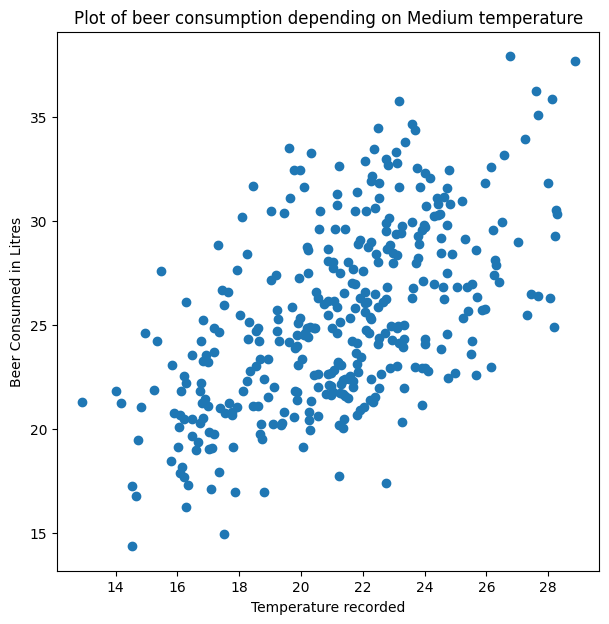

In [14]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(x=beer_df["Temperatura Media (C)"], y=beer_df["Consumo de cerveja (litros)"])
ax.set_title("Plot of beer consumption depending on Medium temperature")
ax.set_ylabel("Beer Consumed in Litres")
ax.set_xlabel("Temperature recorded");

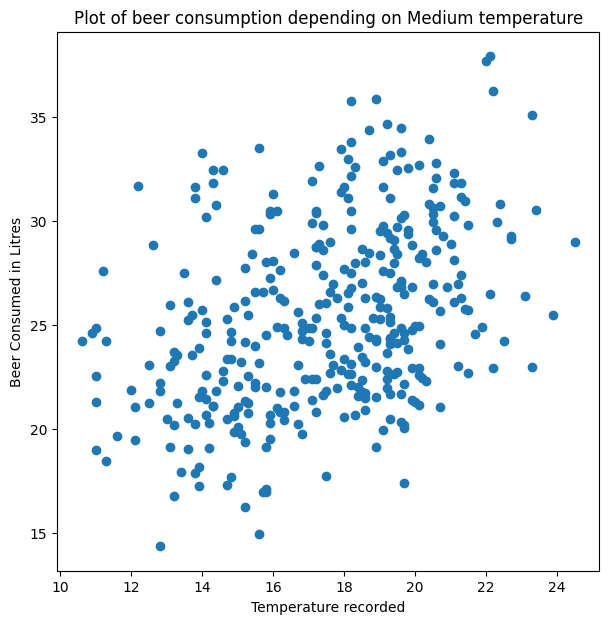

In [15]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(x=beer_df["Temperatura Minima (C)"], y=beer_df["Consumo de cerveja (litros)"])
ax.set_title("Plot of beer consumption depending on Medium temperature")
ax.set_ylabel("Beer Consumed in Litres")
ax.set_xlabel("Temperature recorded");

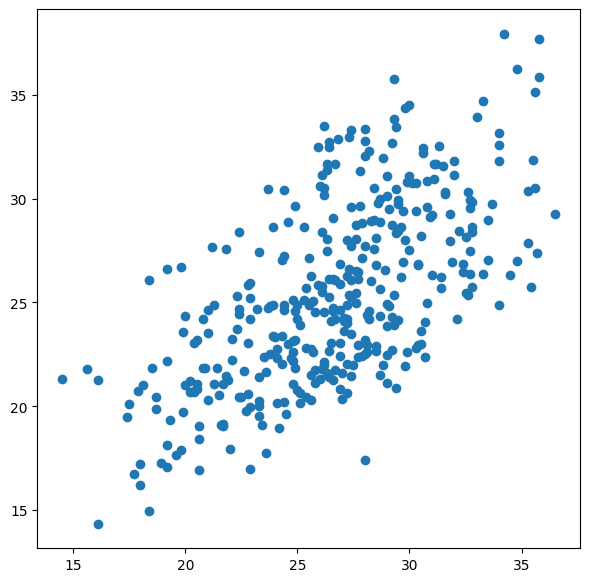

In [16]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(x=beer_df["Temperatura Maxima (C)"], y=beer_df["Consumo de cerveja (litros)"]);

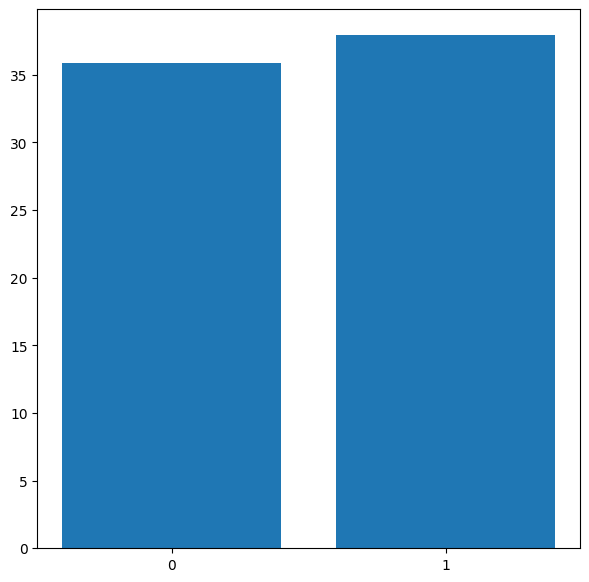

In [17]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.bar(x=beer_df["Final de Semana"], height=beer_df["Consumo de cerveja (litros)"]);
ax.set_xticks([0, 1]);

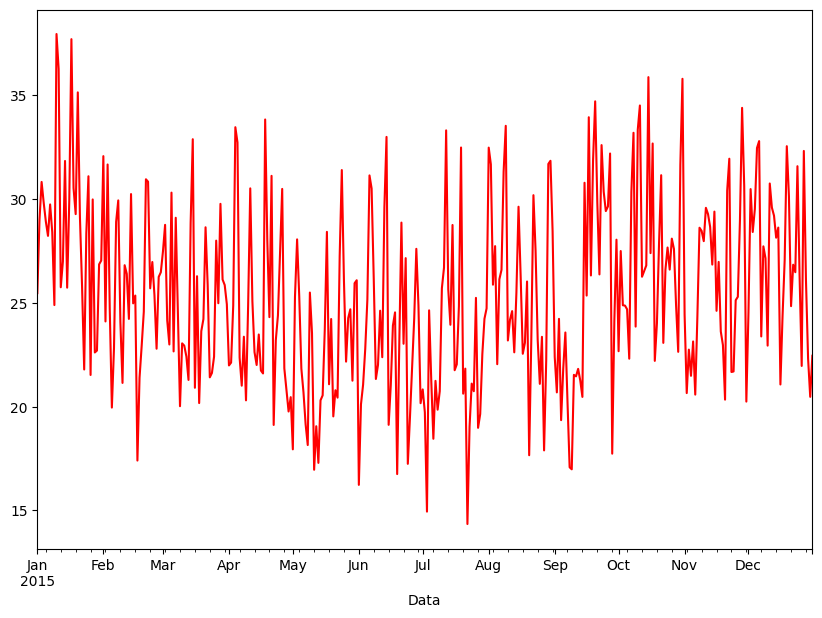

In [18]:
fig, ax = plt.subplots(figsize=(10, 7))
beer_df["Consumo de cerveja (litros)"].plot(color="red", ax=ax);

#### Handling The Outlier Values

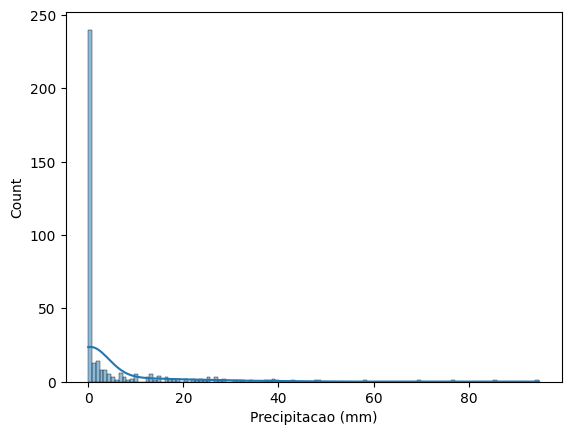

In [19]:
sns.histplot(beer_df["Precipitacao (mm)"], kde=True, binwidth=0.8);

The distribution is not normal so using the z-score and iq range to cap outlier would be nice
So I will normalize the data first

In [23]:
# scaler = StandardScaler()

# Fit the scaler to your data and transform it
# beer_df["Precipitacao (mm)"] = scaler.fit_transform(beer_df[["Precipitacao (mm)"]])


beer_df["Precipitacao (mm)"].skew()

upper = beer_df["Precipitacao (mm)"].mean() + 3 * beer_df["Precipitacao (mm)"].std()
lower = beer_df["Precipitacao (mm)"].mean() - 3 * beer_df["Precipitacao (mm)"].std()
print(lower , upper)

len(beer_df[(beer_df["Precipitacao (mm)"] > upper) | (beer_df["Precipitacao (mm)"] < lower)]) / len(beer_df) * 100

-32.05681927213513 42.45024392966937


2.191780821917808

#### Since the outliers make up only 2% of the entire dataset I presume this to be error entries and I would be trimming instead of capping my original idea

In [33]:
b_df = beer_df[(beer_df["Precipitacao (mm)"] < upper)  & (beer_df["Precipitacao (mm)"] > lower)]
b_df.shape

(357, 8)

#### Spliting the data into test and train sets for training

In [34]:
b_df.shape

(357, 8)

In [45]:
X = b_df.drop(columns=["Consumo de cerveja (litros)", "Temperatura Media (C)"], axis=1)
y = b_df["Consumo de cerveja (litros)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)
model.score(X_test, y_test)

0.7209142565331026

In [46]:
ensemble_model = RandomForestRegressor(random_state=42)
ensemble_model.fit(X_train, y_train)
ensemble_model.score(X_train, y_train)
ensemble_model.score(X_test, y_test)

0.681870128991325

In [39]:
# Evaluating accuracy of the model
y_preds = model.predict(X_test)
e_y_preds = ensemble_model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
rmse = math.sqrt(mean_squared_error(y_test, y_preds))
r2 = r2_score(y_test, y_preds)


e_mae = mean_absolute_error(y_test, e_y_preds)
e_rmse = math.sqrt(mean_squared_error(y_test, e_y_preds))
e_r2  = r2_score(y_test, e_y_preds)

print(f"""
metrics for LinearRegressor
mae : {mae}
rmse: {rmse}
r2: {r2}

metrics for RandomForest
mae : {e_mae}
rmse: {e_rmse}
r2: {e_r2}
""")


metrics for LinearRegressor
mae : 2.2026073128113
rmse: 2.539729100494641
r2: 0.7199435818855798

metrics for RandomForest
mae : 2.2769244444444428
rmse: 2.6676393767124957
r2: 0.6910238350971925



### Practice Closed for this session

I checked for null, duplicates data and handled them by dropping <br>
Should some relationship between features and the target column
From the correlation I dropped Temperatura Media (C) because it had good correlation with other features
Even though the Precipitation vectors were not normally distributed I still used the Z_scores to detect outliers and I removed them
Then trained the LinearRegression model and the RandomForestRegressor (though the RandomForestRegressor model was overfitting

I don't totally understand metrics yet but I still checked the metrics and the scores are not so bad